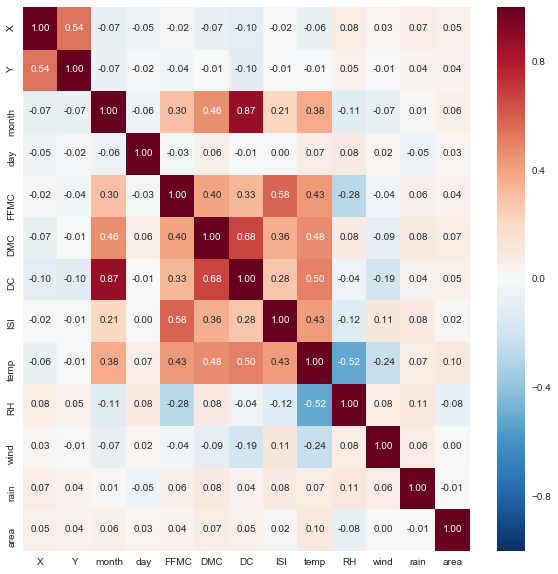

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns


# Import the dataset
dataset = pd.read_csv('train.csv')
full_dataset = dataset.iloc[:, :].values
X = full_dataset[:, :-1]
y = full_dataset[:, 12]
y = y > 0
# https://www.python-course.eu/numpy_masking.php
# convert the array to a normal int instead of boolean
y = y.astype(np.int)

dataset_test = pd.read_csv('test.csv')
X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 12].values
y_test = y_test > 0
y_test = y_test.astype(np.int)

# plot the heatmap showing correlation among features
corr = dataset.corr()
fig = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [3]:
X

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [4]:
X.shape


(466, 12)

In [5]:
full_dataset.shape



(466, 13)

In [6]:
y.shape


(466,)

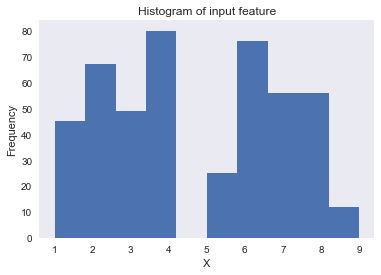

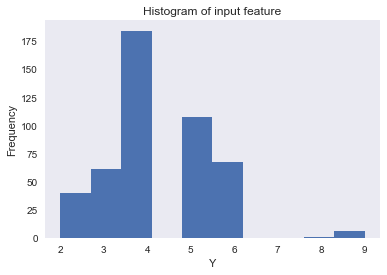

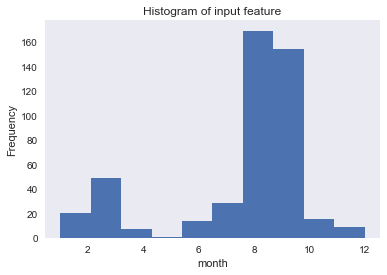

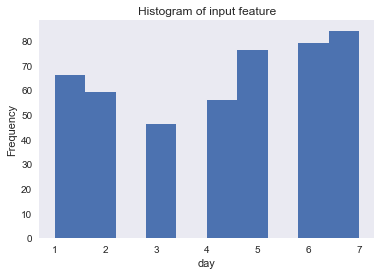

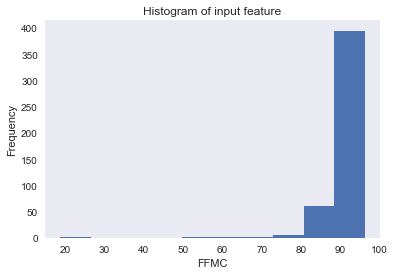

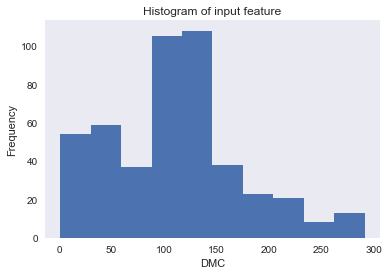

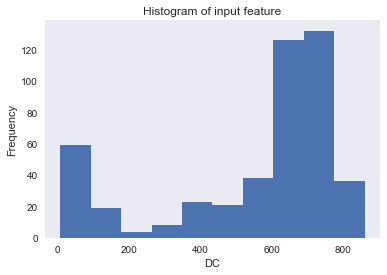

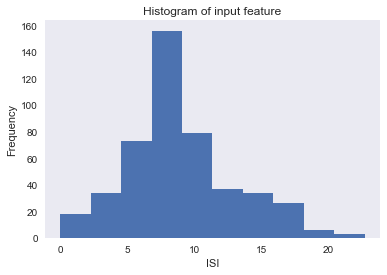

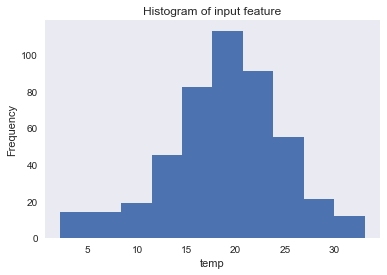

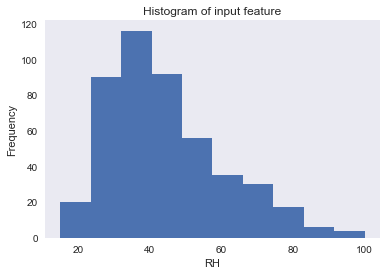

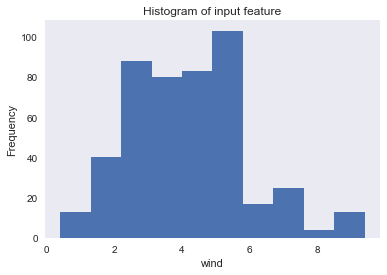

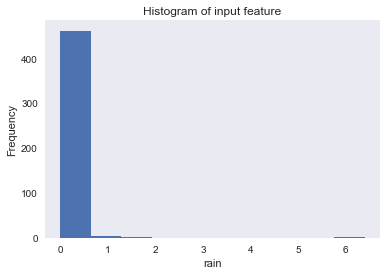

In [7]:
col_list = list(dataset)
for feature in range(0,12,1):
    plt.title('Histogram of input feature')
    plt.hist(X[:,feature])
    plt.xlabel(col_list[feature])
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

In [8]:
# Feature Standardization
import sklearn 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
# This will use the training set values for the Standardization
X_test = sc_x.transform(X_test)

In [9]:
X[0] 

array([ 0.99844806,  0.57178863, -1.97750922,  0.35505616, -0.81871326,
       -1.34764219, -1.86080463, -0.95734351, -1.85456574,  0.43098712,
        1.46684182, -0.07719623])

In [10]:
X_test[0]

array([-0.28566453,  0.57178863, -1.97750922,  0.35505616, -0.87349792,
       -1.45379065, -2.01176681, -1.52748341, -1.07604463,  0.49242486,
        1.24607532, -0.07719623])

In [11]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0])

In [12]:
"""
col_list = list(dataset)
for feature in range(0,12,1):
    plt.title('Histogram of input feature')
    plt.hist(X[:,feature])
    plt.xlabel(col_list[feature])
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
"""    

"\ncol_list = list(dataset)\nfor feature in range(0,12,1):\n    plt.title('Histogram of input feature')\n    plt.hist(X[:,feature])\n    plt.xlabel(col_list[feature])\n    plt.ylabel('Frequency')\n    plt.grid()\n    plt.show()\n"

In [13]:
def KNNClassifier(K, X, y, test_samples):
    y_copy = np.copy(y)
    y_copy = np.reshape(y_copy,(X.shape[0], 1))
    TrainingData = np.append(X, y_copy, axis=1)
    prediction=[]
    for test_sample in test_samples:
        sorted_neighbours =\
        sorted(TrainingData,key=\
               lambda\
               Trainingsample:\
               np.linalg.norm(Trainingsample[0:12]-test_sample))
        
        sorted_neighbours = np.asarray(sorted_neighbours)
        k_neighbors = sorted_neighbours[0:K, 12]
        unique, counts = np.unique(k_neighbors, return_counts=True)
        pred_map = dict(zip(unique, counts))
        
        if 0.0 not in pred_map:
            pred_map[0.0] = 0
        
        if 1.0 not in pred_map:
            pred_map[1.0] = 0
            
        if (pred_map[0.0]>pred_map[1.0]):
            prediction.append(0)
        else:
            prediction.append(1)
    return np.array(prediction)
    

In [14]:
# K-fold validation
# code referenced from this book - https://www.manning.com/
#                           books/deep-learning-with-python
k = 9
train_data = X
train_targets = y
num_val_samples = train_data.shape[0] // k
accuracy = []
for knn in range(1,52,2):
    all_scores = []
    for i in range(k):
        val_data =\
        train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets =\
        train_targets[i * num_val_samples: (i + 1) * num_val_samples]

        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
             train_targets[(i + 1) * num_val_samples:]],
            axis=0)

        val_pred =\
        KNNClassifier(knn, partial_train_data, partial_train_targets, val_data)
        acc = accuracy_score(val_targets, val_pred)
        all_scores.append(acc)
    accuracy.append(np.mean(all_scores))    



[0.4139433551198257, 0.41612200435729846, 0.3790849673202615, 0.39215686274509803, 0.3986928104575163, 0.3943355119825708, 0.38344226579520696, 0.39651416122004357, 0.40305010893246185, 0.4139433551198257, 0.420479302832244, 0.41830065359477125, 0.42265795206971674, 0.41612200435729846, 0.40305010893246185, 0.4095860566448801, 0.420479302832244, 0.41612200435729846, 0.420479302832244, 0.42265795206971674, 0.43137254901960786, 0.43572984749455335, 0.43572984749455335, 0.43137254901960786, 0.42701525054466233, 0.42483660130718953]


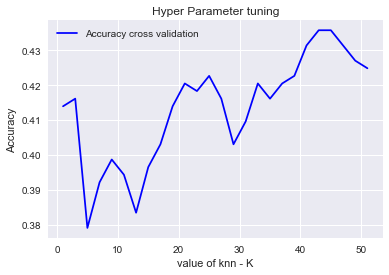

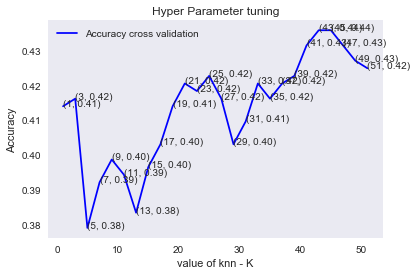

Highest Accuracy is 0.43572984749455335


In [15]:
print (accuracy)

epochs = range(1, 52, 2)    
plt.plot(epochs, accuracy, 'b', label='Accuracy cross validation')
plt.title('Hyper Parameter tuning')
plt.xlabel('value of knn - K')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

A = epochs
B = accuracy

plt.plot(A,B,'b', label='Accuracy cross validation')
for xy in zip(A, B):                                       # <--
    ax.annotate('(%s, %.2f)' % xy, xy=xy, textcoords='data') # <--

plt.title('Hyper Parameter tuning')
plt.xlabel('value of knn - K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

print('Highest Accuracy is {}'.format(accuracy[-5]))

In [16]:
# Making Predictions
y_pred = KNNClassifier(43, X, y, X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.6470588235294118
[[11 13]
 [ 5 22]]


In [17]:
# Trying other metrics
# https://scikit-learn.org/stable/modules/
# generated/sklearn.neighbors.DistanceMetric.html

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=43, metric='manhattan')
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6078431372549019

In [18]:
classifier = KNeighborsClassifier(n_neighbors=43, metric='chebyshev')
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6274509803921569

In [19]:
classifier = KNeighborsClassifier(n_neighbors=43, metric='hamming')
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.5098039215686274

In [20]:
classifier = KNeighborsClassifier(n_neighbors=43, metric='braycurtis')
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6666666666666666

In [21]:
classifier = KNeighborsClassifier(n_neighbors=43, metric='jaccard')
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.47058823529411764

In [22]:
# Custome metric = hamming distance for categorical data 
# and euclidean for real valued
from sklearn.neighbors import DistanceMetric
def mydist(x, y):
    euclidean = np.sum((x[4:]-y[4:])**2)
    hamming = sum(ch1 != ch2 for ch1, ch2 in zip(x[0:4], y[0:4]))
    return euclidean + hamming

classifier = KNeighborsClassifier(n_neighbors=43, metric=mydist)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.5490196078431373

In [23]:
# Custome metric = similarity(opposite of hamming) 
# for categorical data and euclidean for real valued
from sklearn.neighbors import DistanceMetric
def mydist(x, y):
    euclidean = np.sum((x[4:]-y[4:])**2)
    similarity = sum(ch1 == ch2 for ch1, ch2 in zip(x[0:4], y[0:4]))
    return euclidean + similarity

classifier = KNeighborsClassifier(n_neighbors=43, metric=mydist)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6666666666666666